In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 作业

##  1.墨尔本1981年至1990年的每月温度情况

- 请利用数据，画出如下的图：

<img src="https://s1.ax1x.com/2020/11/01/BwvCse.png" width="800" align="bottom" />

In [2]:
ex1 = pd.read_csv('data/layout_ex1.csv')

ex1['Time']=pd.to_datetime(ex1['Time'])
ex1['year'], ex1['month'] = ex1['Time'].dt.year, ex1['Time'].dt.month


df=ex1.groupby(['year','month'])['Temperature'].mean().reset_index().sort_values(by=['year','month'])

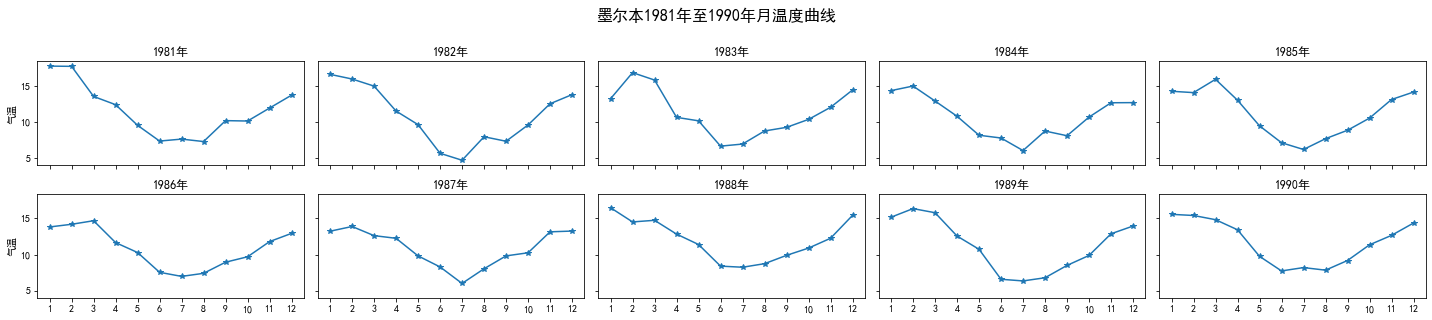

In [3]:
m=1981
fig, axs = plt.subplots(2, 5, figsize=(20, 4), sharex=True, sharey=True)
fig.suptitle('墨尔本1981年至1990年月温度曲线', size=16,y=1.1)
for i in range(2):
    for j in range(5):
        df.loc[df['year']==m,['month','Temperature']].plot(x='month',y='Temperature',ax=axs[i,j],marker='*',legend=False)
        axs[i][j].set_xticks(np.arange(1,13,1))
        axs[i][j].set_yticks(np.arange(5,16,5))
        axs[i][j].set_title('%d年'%(m))
        axs[i][j].set_xlabel('')
        if j==0: axs[i][j].set_ylabel('气温')
        m=m+1
fig.tight_layout()

## 2. 画出数据的散点图和边际分布

- 用 `np.random.randn(2, 150)` 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图

<img src="https://s1.ax1x.com/2020/11/01/B0pEnS.png" width="400" height="400" align="bottom" />

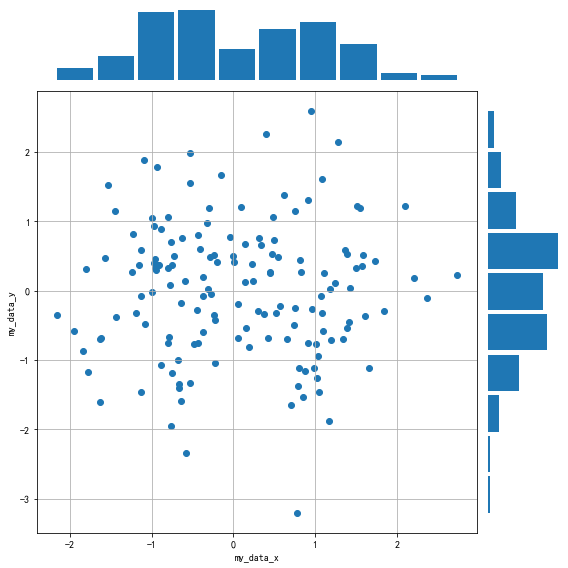

In [4]:
##方法1
x,y=np.random.randn(2, 150)
fig = plt.figure(figsize=(8,8))
spec = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[6,1], height_ratios=[1,6])
for i in range(2):
    for j in range(2):
        if i==0 and j==1:
            pass
        else:
            ax = fig.add_subplot(spec[i, j])
        if i==0:
            if j==0:
                ax.hist(x,density = True,rwidth = 0.9) 
                ax.axis("off")
        else:
            if j==1:
                ax.hist(y,density = True,rwidth = 0.9,orientation='horizontal')
                ax.axis("off")
            else:
                ax.scatter(x,y)
                ax.grid(True)
                ax.set_xlabel("my_data_x") 
                ax.set_ylabel("my_data_y") 

fig.tight_layout()

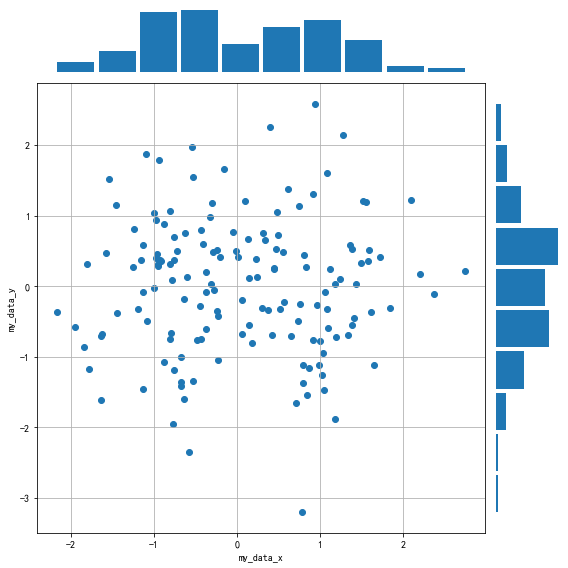

In [5]:
#方法2：
fig = plt.figure(figsize=(8,8))
spec = fig.add_gridspec(nrows=7, ncols=7)

# sub1
ax= fig.add_subplot(spec[0:1,0:6])
ax.hist(x,density = True,rwidth = 0.9)  
ax.axis("off")
#scatter plot
ax = fig.add_subplot(spec[1:7,0:6])
ax.scatter(x,y)
ax.set_xlabel("my_data_x") 
ax.set_ylabel("my_data_y") 
ax.grid()
#hist plot2
ax = fig.add_subplot(spec[1:7,6:7])
ax.hist(y,density = True,rwidth = 0.9,orientation='horizontal')
ax.axis("off")
fig.tight_layout()



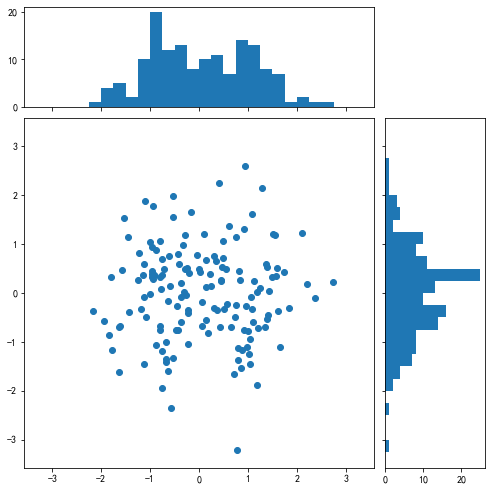

In [6]:
##方法3 官网 https://matplotlib.org/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py
# start with a square Figure，其他不调整，仅学习参考

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()

# 主要内容
## 一、子图

### 1. 使用 `plt.subplots` 绘制均匀状态下的子图 

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

>matplotlib.pyplot.subplots(nrows=1, ncols=1, * , sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)[source]



返回元素分别是画布和子图构成的列表，第一个数字为行，第二个为列

`figsize` 参数可以指定整个画布的大小

`sharex` 和 `sharey` 分别表示是否共享横轴和纵轴刻度

`tight_layout` 函数可以调整子图的相对大小使字符不会重叠

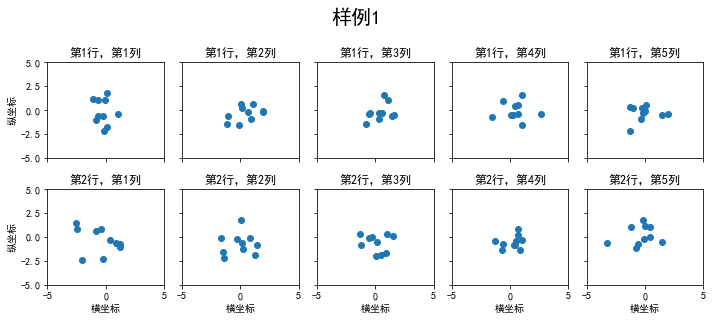

In [7]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20,y=1.1)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
fig.tight_layout()

除了常规的直角坐标系，也可以通过`projection`方法创建极坐标系下的图表

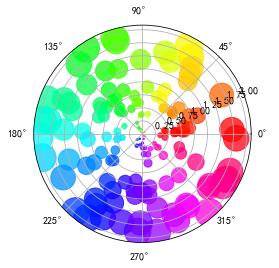

In [8]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta


plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

### 2. 使用 `GridSpec` 绘制非均匀子图

>add_gridspec(self, nrows=1, ncols=1, **kwargs)

Return a GridSpec that has this figure as a parent. This allows complex layout of axes in the figure.

>class matplotlib.gridspec.GridSpec(nrows, ncols, figure=None, left=None, bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, height_ratios=None)

所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态

利用 `add_gridspec` 可以指定相对宽度比例 `width_ratios` 和相对高度比例参数 `height_ratios`

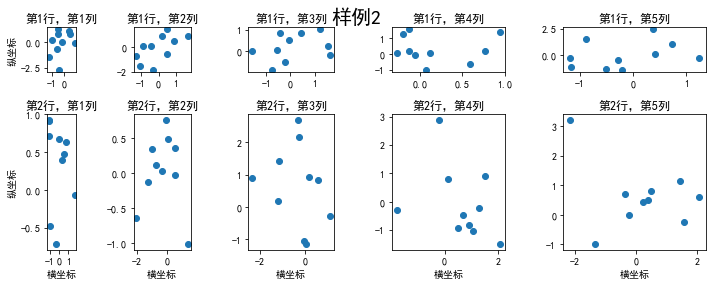

In [9]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

在上面的例子中出现了 `spec[i, j]` 的用法，事实上通过切片就可以实现子图的合并而达到跨图的共能

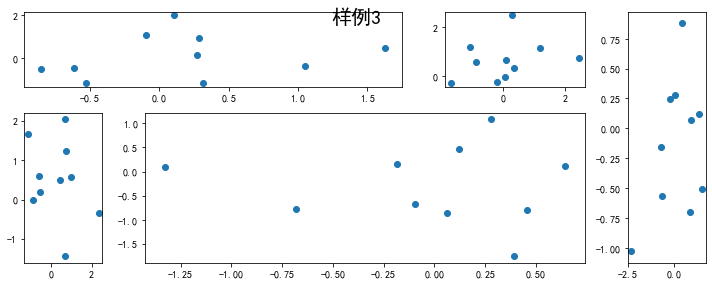

In [10]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('样例3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

## 二、子图上的方法

在 `ax` 对象上定义了和 `plt` 类似的图形绘制函数，常用的有： `plot, hist, scatter, bar, barh, pie`

`ax.grid(True)`添加灰色网格

使用 `set_xscale, set_title, set_xlabel` 分别可以设置坐标轴的规度（指对数坐标等）、标题、轴名

与一般的 `plt` 方法类似， `legend, annotate, arrow, text` 对象也可以进行相应的绘制

https://matplotlib.org/api/axes_api.html

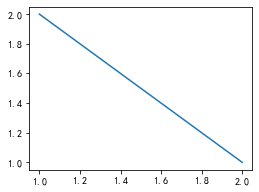

In [11]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot([1,2],[2,1])

(array([  6.,  18.,  81., 178., 229., 243., 166.,  60.,  17.,   2.]),
 array([-3.14509042, -2.4957784 , -1.84646638, -1.19715436, -0.54784234,
         0.10146968,  0.75078169,  1.40009371,  2.04940573,  2.69871775,
         3.34802977]),
 <a list of 10 Patch objects>)

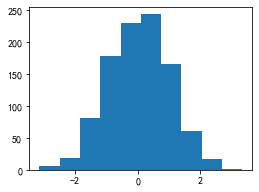

In [12]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(np.random.randn(1000))

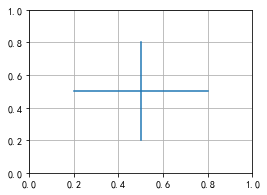

In [13]:
fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8)
ax.axvline(0.5,0.2,0.8)
#ax.axline([0.3,0.3],[0.7,0.7])这部分因为版本问题出错
ax.grid(True)

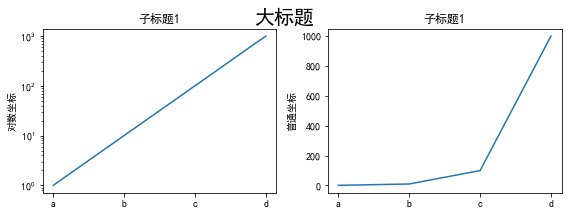

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
fig.suptitle('大标题', size=20)
for j in range(2):
    axs[j].plot(list('abcd'), [10**i for i in range(4)])
    if j==0:
        axs[j].set_yscale('log')
        axs[j].set_title('子标题1')
        axs[j].set_ylabel('对数坐标')
    else:
        axs[j].set_title('子标题1')
        axs[j].set_ylabel('普通坐标')
fig.tight_layout()

Text(0.8, 0.2, '这是中点')

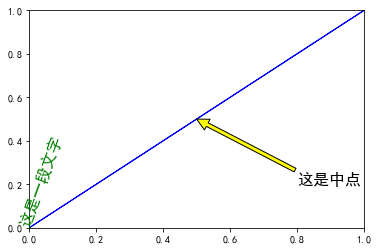

In [15]:
fig, ax = plt.subplots()
ax.arrow(0, 0, 1, 1, head_width=0.03, head_length=0.05, facecolor='red', edgecolor='blue')
ax.text(x=0, y=0,s='这是一段文字', fontsize=16, rotation=70, rotation_mode='anchor', color='green')
ax.annotate('这是中点', xy=(0.5, 0.5), xytext=(0.8, 0.2), arrowprops=dict(facecolor='yellow', edgecolor='black'), fontsize=16)